# Data inspection

Below we can find the performance results of a mini benchmark [`bench-stat`](https://github.com/janhybs/bench-stat)
which were collected via `ci-hpc` framework.

The benchmark `bench-stat` was executed on a `charon` resource.

## About `bench-stat` application

`bench-stat` is application written in a `c++` language consists of 3 benchmarks performing simple memory operations in a level 1, level 2 and level 3 cache.

These operations can be extremely fast, thus the experiments are *repeated* `N` times to obtain measurable duration of the benchmarks.

$$N = 1024 * 1024 * reps$$
where $reps$ is a extra repetition coefficient which is altered in all of the commits.

As a baseline commit tagged as `reps-100` was selected, where $reps = 100$.
The total number of repetition for this commit is $N = 1024 * 1024 * 100 = 104\ 857\ 600$

A commits with maximum and minumum number of $reps$ are tagged as `reps-125` and `reps-075` respecively, meaning
theres a $\pm 25%$ performance change compared to baseline.

## Data structure 

In table below we can see a *simplified* format of the data collected. The most of the fields are self-explanitory
however some of them require explanation:

 - `tag` - a `git` tag of a commit making the results more human-readible
 - `timepoint` - numerical value of a `tag` for further purposes
 - `no` - i-th repetition

In [96]:
#%matplotlib widget
%matplotlib inline
z = 1.0#11.0/18.0
from cihpc.exp import exp_02_init as env
env = env.reload(env)
np, sc, pd, plt, sea = env.np, env.sc, env.pd, env.plt, env.sea
f_oneway = sc.stats.f_oneway
df = env.fetch_data()
print('shape', df.shape)
df.head()

shape (2085, 16)


,_id,commit,walltime,timepoint,tag,$tag$,hpc,excl,datetime,timestamp,dt_group,dt,no,walltime_mem_l1,walltime_mem_l2,walltime_mem_l3
0,5c34d3761f29fcc3d76fff8f,75d38b25,5.420462,75,reps-075,$reps^{075}$,charon20,True,2019-01-08 16:44:38+00:00,1.546966e+09,e0,2019-01-08 (16:44 - 21:10),0,1.358015,1.808600,2.253832
1,5c35050d1f29fc9dc62ed4a0,75d38b25,5.267244,75,reps-075,$reps^{075}$,charon20,True,2019-01-08 20:16:13+00:00,1.546979e+09,e0,2019-01-08 (16:44 - 21:10),49,1.351480,1.659111,2.256641
2,5c3505121f29fc9dc62ed4a1,75d38b25,5.253323,75,reps-075,$reps^{075}$,charon20,True,2019-01-08 20:16:18+00:00,1.546979e+09,e0,2019-01-08 (16:44 - 21:10),50,1.324061,1.686857,2.242390
3,5c3505171f29fc9dc62ed4a2,75d38b25,5.324426,75,reps-075,$reps^{075}$,charon20,True,2019-01-08 20:16:23+00:00,1.546979e+09,e0,2019-01-08 (16:44 - 21:10),51,1.336381,1.720891,2.267141
4,5c35051d1f29fc9dc62ed4a3,75d38b25,5.266860,75,reps-075,$reps^{075}$,charon20,True,2019-01-08 20:16:29+00:00,1.546979e+09,e0,2019-01-08 (16:44 - 21:10),52,1.334078,1.667374,2.265396


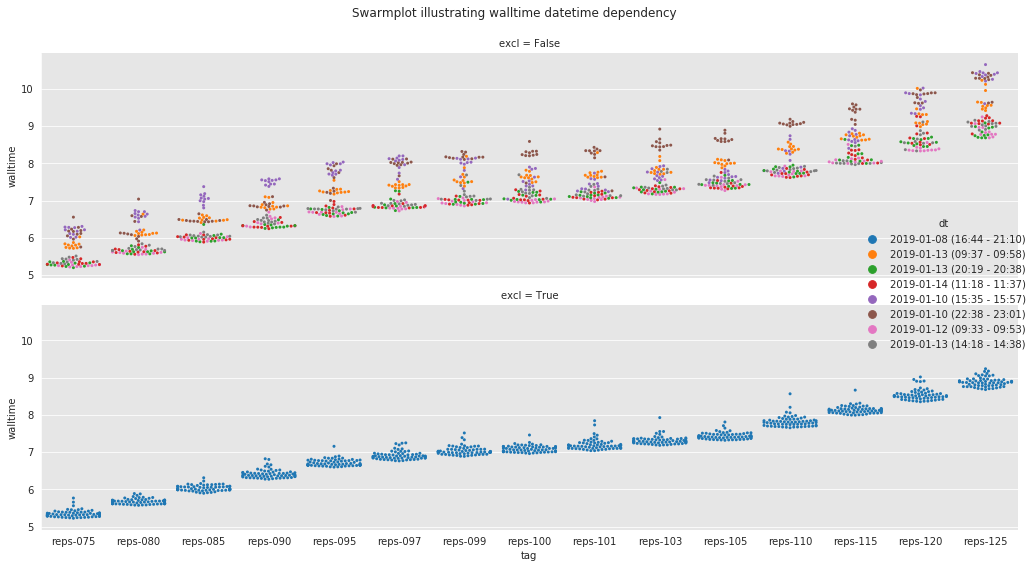

In [97]:
sea.catplot('tag', 'walltime', 'dt', data=df, row='excl', kind='swarm', height=4, aspect=3, s=3)
plt.suptitle('Swarmplot illustrating walltime datetime dependency')
plt.tight_layout()
plt.gcf().subplots_adjust(top=0.9)
env.figsave(i=1)

## Impact of individual commits on a duration

Chart below illustrates relation between `walltime [sec]` and commits, marked as

$$reps^{075}, reps^{080}, \dots, reps^{095}, reps^{097}, reps^{099}, reps^{100}, reps^{101}, reps^{103}, reps^{105}, reps^{110}, \dots, reps^{125}$$

count      mean       std       min       25%       50%  \
tag      excl                                                             
reps-075 False   77.0  5.635221  0.391096  5.202364  5.294700  5.433628   
         True    62.0  5.348557  0.097049  5.227812  5.287312  5.325438   
reps-080 False   77.0  5.954039  0.391192  5.550385  5.642537  5.770123   
         True    62.0  5.678179  0.073591  5.575069  5.619061  5.671772   
reps-085 False   77.0  6.299638  0.388934  5.889060  6.001103  6.083495   
         True    62.0  6.037614  0.078705  5.898752  5.984447  6.017566   
reps-090 False   77.0  6.693824  0.410463  6.248363  6.331692  6.538397   
         True    62.0  6.422799  0.117234  6.275382  6.345892  6.392579   
reps-095 False   77.0  7.083487  0.471769  6.577447  6.693364  6.818511   
         True    62.0  6.721366  0.094811  6.600902  6.650632  6.695364   
reps-097 False   77.0  7.282296  0.506033  6.726944  6.851322  7.007133   
         True    62.0  6.918086  0.114804  6.768079  6.842427  6.890303   
reps-099 False   77.0  7.414535  0.497409  6.859183  7.006666  7.124677   
         True    62.0  7.042823  0.116770  6.889166  6.972555  7.011878   
reps-100 False   77.0  7.405223  0.436052  6.938129  7.040041  7.259596   
         True    62.0  7.093686  0.088352  6.963699  7.018932  7.089084   
reps-101 False   77.0  7.417184  0.411192  6.977932  7.112218  7.255780   
         True    62.0  7.207618  0.146720  7.042105  7.108690  7.173459   
reps-103 False   77.0  7.632070  0.446887  7.166888  7.293739  7.420191   
         True    62.0  7.318743  0.113642  7.185323  7.252429  7.294799   
reps-105 False   77.0  7.729006  0.430313  7.273009  7.428744  7.553946   
         True    62.0  7.440791  0.092816  7.320915  7.381739  7.420982   
reps-110 False   77.0  8.101677  0.485467  7.621582  7.758633  7.861886   
         True    62.0  7.823826  0.146040  7.657138  7.727313  7.804145   
reps-115 False   77.0  8.483988  0.472050  7.968562  8.063601  8.367471   
         True    62.0  8.137335  0.103731  7.995107  8.069129  8.125219   
reps-120 False   77.0  9.016279  0.556875  8.335785  8.541926  8.816874   
         True    62.0  8.545331  0.146651  8.355808  8.454462  8.513479   
reps-125 False   77.0  9.441521  0.621197  8.687830  8.967268  9.146581   
         True    62.0  8.887986  0.126913  8.681858  8.790484  8.874908   

                      75%        max  
tag      excl                         
reps-075 False   6.020861   6.558766  
         True    5.387577   5.770359  
reps-080 False   6.134143   7.043992  
         True    5.714966   5.890615  
reps-085 False   6.490674   7.377536  
         True    6.080361   6.314405  
reps-090 False   6.865852   7.587250  
         True    6.465295   6.824703  
reps-095 False   7.309982   8.036691  
         True    6.775897   7.159690  
reps-097 False   7.742299   8.202521  
         True    6.960714   7.251064  
reps-099 False   7.979015   8.321705  
         True    7.079613   7.517297  
reps-100 False   7.637677   8.591420  
         True    7.145386   7.462409  
reps-101 False   7.631878   8.432895  
         True    7.256042   7.846398  
reps-103 False   7.841305   8.922563  
         True    7.358529   7.929847  
reps-105 False   7.974679   8.892609  
         True    7.482217   7.811440  
reps-110 False   8.381725   9.187071  
         True    7.877952   8.568630  
reps-115 False   8.743809   9.598881  
         True    8.172845   8.667684  
reps-120 False   9.492876  10.022719  
         True    8.582911   9.020817  
reps-125 False  10.211411  10.654035  
         True    8.946518   9.240972

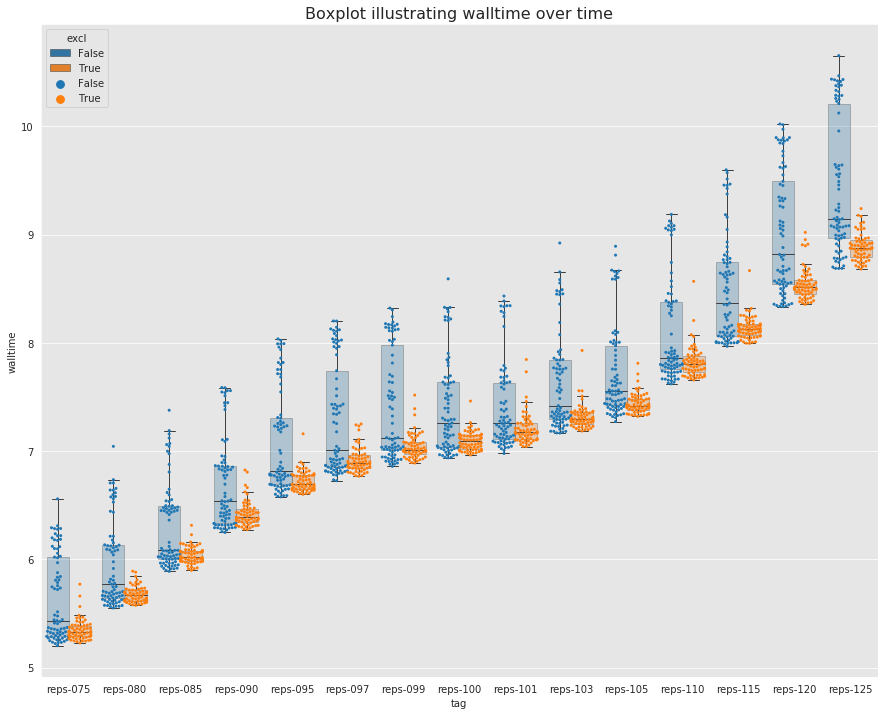

In [98]:
plt.figure(figsize=(15*z, 12))
ex_kws = dict(showfliers=False, boxprops=env.alpha_style(0.3, '-'), meanline=True)
sea.boxplot('tag', 'walltime', 'excl', data=df, linewidth=1.0, dodge=True, **ex_kws)
sea.swarmplot('tag', 'walltime', 'excl', data=df, size=3, dodge=True)
plt.title('Boxplot illustrating walltime over time', size=16);
env.figsave(i=2)
df.groupby(by=['tag', 'excl'])['walltime'].describe()

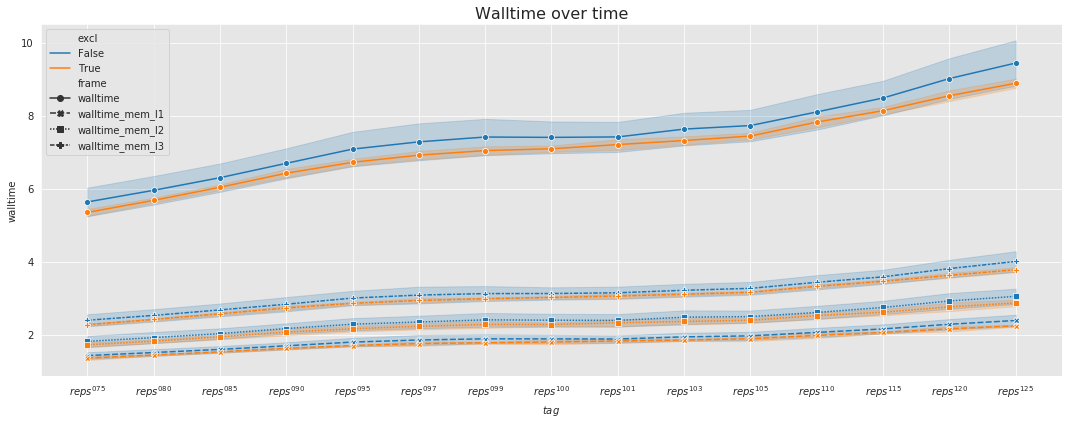

In [101]:
walls = ['walltime', 'walltime_mem_l1', 'walltime_mem_l2', 'walltime_mem_l3']
df2 = env.unwrap(df, walls, 'frame',  'walltime', ['tag', '$tag$', 'excl', 'hpc'])
plt.figure(figsize=(15*z, 6))
sea.lineplot(data=df2, x='$tag$', y='walltime', style='frame', hue='excl', markers=True, ci='sd')
plt.title('Walltime over time', size=16);
plt.tight_layout()
env.figsave(i=3)

In [131]:
import matplotlib
matplotlib.__version__

'3.0.2'

## Data distribution for individual commits

Charts below show histogram for each of the 15 commits along with `normal` fit (gray dashed line)

Subplot title consists of 3 lines:

 1. `git tag` value, e.g. $reps^{075}$
 2. `bench-stat` running **exclusively** (no other job present on chosen vnode) using vnode `charon20.nti.tul.cz` in **orange** color
 2. `bench-stat` running in **a normal mode** (vnode shared among other jobs) using vnodes `charon*.nti.tul.cz` in **blue** color


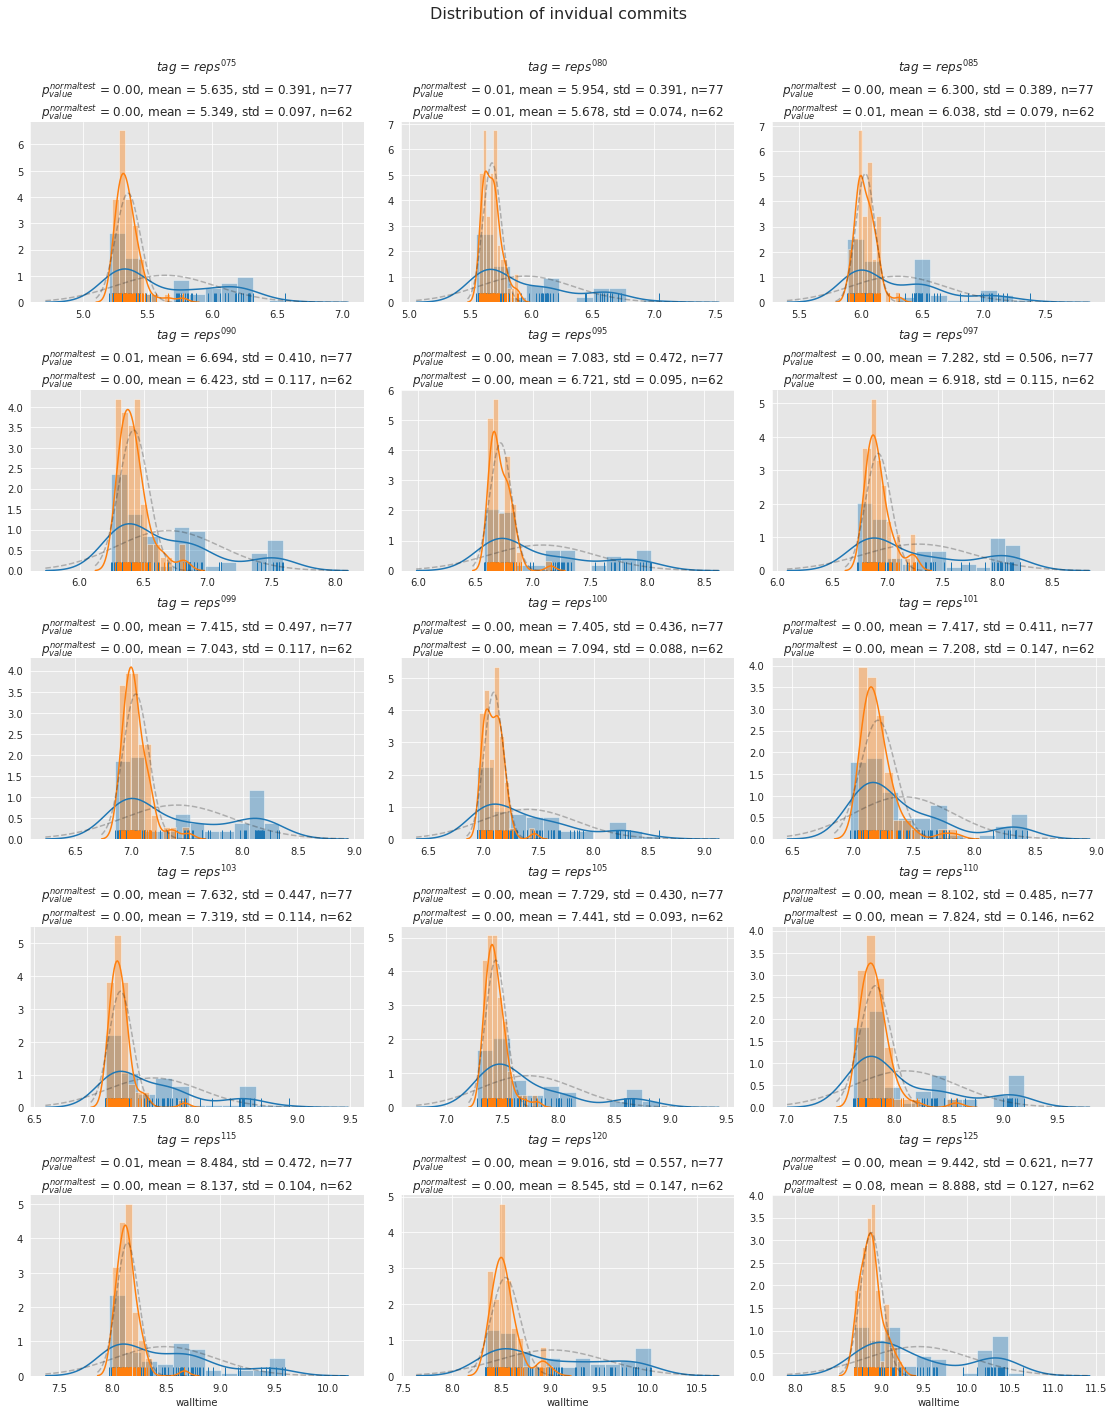

In [102]:
def add_to_title(*series):
    ax = plt.gca()
    title = ax.get_title()
    
    for walltime, in series:
        try:
            p_value = sc.stats.normaltest(walltime)[1]
        except:
            p_value = 0.0
        stats = walltime.describe()
        title += ('\n$p^{normaltest}_{value}$ = %1.2f, '
                  'mean = %1.3f, std = %1.3f, n=%d') % (p_value, stats['mean'], stats['std'], stats['count'])
    ax.set_title(title)
    
#df['np.log(walltime)'] = np.log10(df['walltime'])
g = sea.FacetGrid(df, col='$tag$', col_wrap=3, aspect=1.3*z, height=4, sharex=False, sharey=False, hue='excl')
g.map(sea.distplot, 'walltime', bins=11, rug=True, fit=sc.stats.norm, fit_kws=env.alpha_style(0.3, '--'));
g.fig.suptitle("Distribution of invidual commits", size=16)
env.map_facetgrid(g, add_to_title, 'walltime')
plt.tight_layout()
g.fig.subplots_adjust(top=0.9)
env.figsave(i=4)

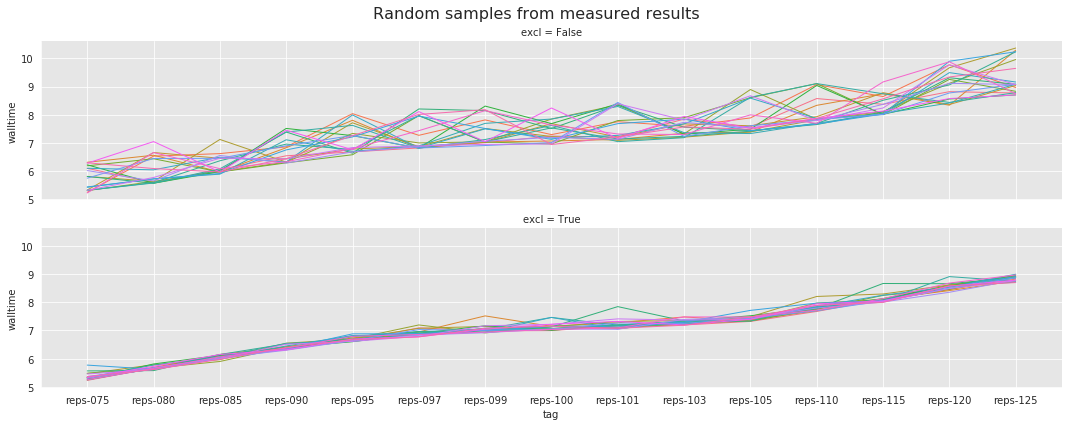

In [103]:
df2 = pd.DataFrame()
for i in range(20):
    d = env.sample(df, 1, 'excl', 'tag')
    d['sample'] = i
    df2 = df2.append(d)
    
def lineplot(tag, walltime, **kwargs):
    sea.lineplot(tag, walltime, **kwargs)

g = sea.FacetGrid(df2, row='excl', hue='sample', height=3, aspect=5)
g.map(lineplot, 'tag', 'walltime', lw=1)
plt.suptitle('Random samples from measured results', size=16)
plt.tight_layout()
g.fig.subplots_adjust(top=0.9)
env.figsave(i=5)

# 1-way ANOVA test

The one-way ANOVA tests the null hypothesis that **two or more groups have
the same population mean**. The test is applied to samples from two or more groups,
possibly with differing sizes. The ANOVA test has important assumptions that must be satisfied
in order for the associated p-value to be valid:

  1. The samples are independent.
  2. Each sample is from a normally distributed population.
  3. The population standard deviations of the groups are all equal.
     This property is known as homoscedasticity

In this experiment we will try to find a number of repetition which is necessary for ANOVA to reject null hypothesis 
and accept alternative hypothesis that two groups have different population mean.

In [134]:
excl = df[df['excl'] == True]
nonexcl = df[df['excl'] == False]
sample_sizes = [2, 3, 4, 5, 6, 8, 10, 20, 30, 50]

experiments = [
    # title                    group A     group B     data from exclusive HPC
    ('same performance',       'reps-100', 'reps-100', True),
    (' 1% performance change', 'reps-099', 'reps-100', True),
    (' 3% performance change', 'reps-097', 'reps-100', True),
    (' 5% performance change', 'reps-095', 'reps-100', True),
    ('10% performance change', 'reps-090', 'reps-100', True),
    
    ('same performance',       'reps-100', 'reps-100', False),
    (' 1% performance change', 'reps-099', 'reps-100', False),
    (' 3% performance change', 'reps-097', 'reps-100', False),
    (' 5% performance change', 'reps-095', 'reps-100', False),
    ('10% performance change', 'reps-090', 'reps-100', False),
]

/home/jan-hybs/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 12.4 s, sys: 271 ms, total: 12.7 s
Wall time: 13.6 s


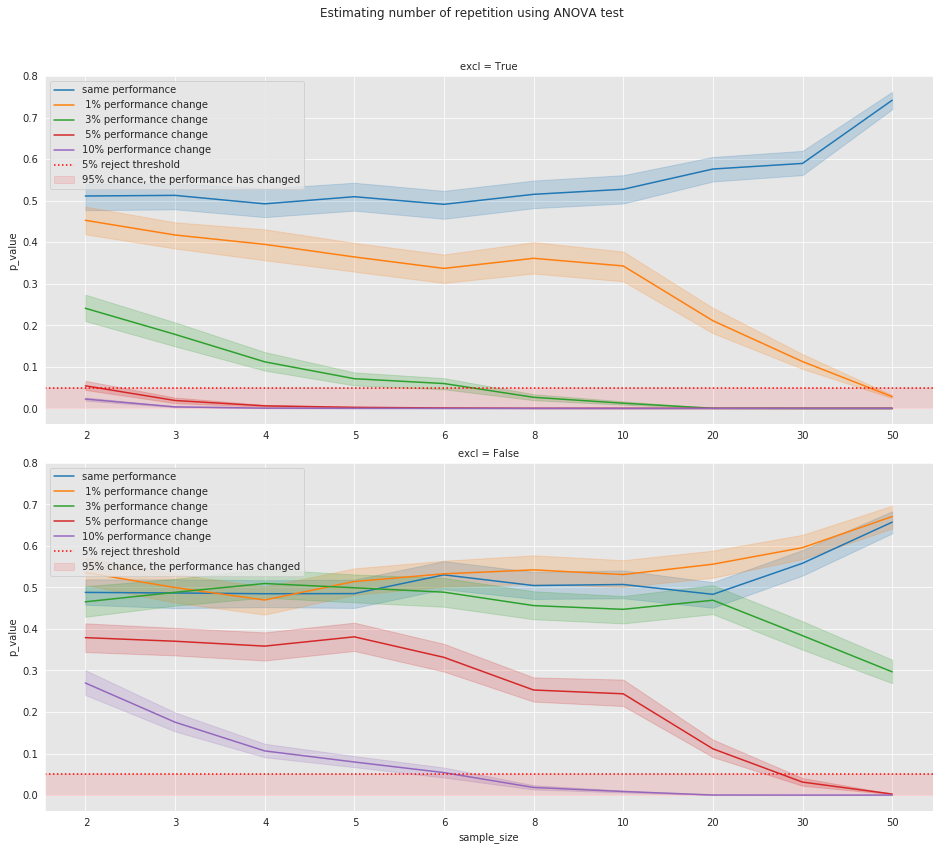

In [132]:
def do_exp(reps=100):
    result = list()
    for experiment, g1_name, g2_name, isexcl in experiments:
        g = excl if isexcl else nonexcl
        g1 = g[g['tag'] == g1_name]['walltime']
        g2 = g[g['tag'] == g2_name]['walltime']

        for sample_size in sample_sizes:
            for more_samples in range(reps):
                a = env.sample(g1, sample_size)
                b = env.sample(g2, sample_size)
                anova_ab = f_oneway(a, b)
                result.append(dict(
                    experiment=experiment,
                    excl=isexcl,
                    sample_size='%2d' % sample_size,
                    p_value=anova_ab[1]
                ))

    df_anova = pd.DataFrame(result)

    g = sea.FacetGrid(df_anova, row='excl', hue='experiment', row_order=[True, False], height=6, aspect=2.2, sharex=False)
    g.map(sea.lineplot, 'sample_size', 'p_value', ci=90)

    for row_axs in g.axes:
        for ax in row_axs:
            ax.axhline(0.05, ls=':', c='r', label='5% reject threshold')
            ax.axhspan(0, 0.05, color='r', alpha=0.1, label='95% chance, the performance has changed')
            ax.legend()


    plt.suptitle('Estimating number of repetition using ANOVA test')
    plt.tight_layout()
    g.fig.subplots_adjust(top=0.9)
    env.figsave(i=6)

%time do_exp(200)

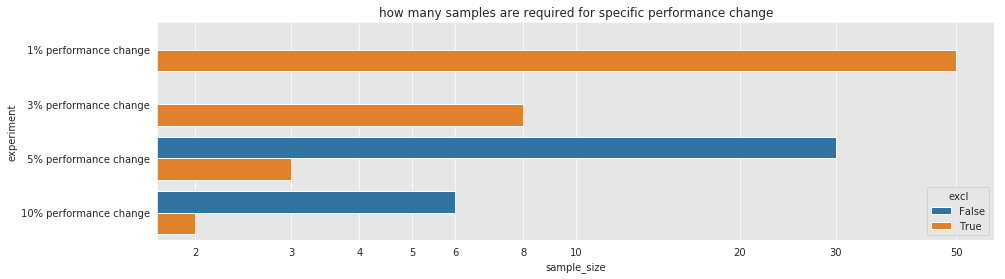

In [135]:
result = dict()
variables = ['excl', 'experiment', 'sample_size']
for g, d in df_anova.groupby(by=variables):
    p_value = d['p_value']
    if p_value.mean() < 0.05:
        if ((g[0], g[1]) not in result) or int(g[2]) < result[(g[0], g[1])]['sample_size']:
            r = dict(zip(variables, g))
            r['mean'] = p_value.mean()
            r['sample_size'] = int(g[2])
            result[(g[0], g[1])] = r

df_result = pd.DataFrame(result).T.reset_index(drop=True)
df_result = df_result.sort_values(by=['experiment', 'excl', 'sample_size'], ascending=True)
plt.figure(figsize=(15*z, 4))
sea.barplot('sample_size', 'experiment', hue='excl', data=df_result, orient='h')
plt.xscale('log')
plt.xticks(sample_sizes, sample_sizes);
plt.title('how many samples are required for specific performance change')
env.figsave(i=7)

# Discussion/findings

A variable $S_n$ designates a number of samples used in groups, a variable $P$ is a $P$ value obtained
from the *1-way ANOVA test* testing the $H_0$ that two groups have the same population mean.

The charts above illustrates how many samples are needed in order to detect performance change in a observed software package.
The charts illustrate results from exclusive and non-exclusive group, respectively.

From the upper chart, we can see that with $S_n=4$ we can detect performance change greater or equal to 5% with 95% certainty
(there is 1/20 probability of finding an effect at least as extreme as the one in a sample data).
In order to detect smaller performance changes, value $S_n$ is increasing exponentially.

/home/jan-hybs/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 18.9 s, sys: 122 ms, total: 19 s
Wall time: 20.9 s


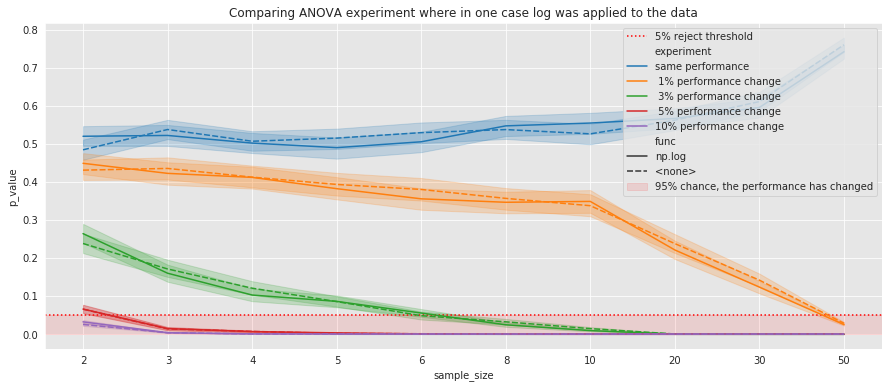

In [137]:
def do_exp(reps=100):
    result = list()
    for experiment, g1_name, g2_name, use_log in experiments:
        g = excl
        pp_func = np.log if use_log else lambda x: x
        g1 = g[g['tag'] == g1_name]['walltime']
        g2 = g[g['tag'] == g2_name]['walltime']

        for sample_size in sample_sizes:
            for more_samples in range(reps):
                a = pp_func(env.sample(g1, sample_size))
                b = pp_func(env.sample(g2, sample_size))
                anova_ab = f_oneway(a, b)
                result.append(dict(
                    experiment=experiment,
                    func='np.log' if use_log else '<none>',
                    sample_size='%2d' % sample_size,
                    p_value=anova_ab[1]
                ))

    df_anova = pd.DataFrame(result)

    plt.figure(figsize=(15*z, 6))
    plt.gca().axhline(0.05, ls=':', c='r', label='5% reject threshold')
    plt.gca().axhspan(0, 0.05, color='r', alpha=0.1, label='95% chance, the performance has changed')
    sea.lineplot('sample_size', 'p_value', data=df_anova, ci=90, hue='experiment', style='func')
    plt.title('Comparing ANOVA experiment where in one case log was applied to the data')
    env.figsave(i=8)

%time do_exp(300)